# Data Project

> **Note:** 
> 1. This is a starting point for how to structure your data project 
> 1. The `dataproject.py` file includes functions which can be in this notebook

Import and set magics:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1.1

We load and download the data using pandas and StatistikBankens API.

103.0
                           TYPE  INDHOLD  INDEKS_2020
TID                                                  
1980-01-01  Forbrugerprisindeks     33.0    32.038835
1980-02-01  Forbrugerprisindeks     33.3    32.330097
1980-03-01  Forbrugerprisindeks     33.8    32.815534
1980-04-01  Forbrugerprisindeks     34.0    33.009709
1980-05-01  Forbrugerprisindeks     34.5    33.495146
                           TYPE  INDHOLD  INDEKS_2020  INFLATION
TID                                                             
1980-01-01  Forbrugerprisindeks     33.0    32.038835        NaN
1980-02-01  Forbrugerprisindeks     33.3    32.330097   0.909091
1980-03-01  Forbrugerprisindeks     33.8    32.815534   1.501502
1980-04-01  Forbrugerprisindeks     34.0    33.009709   0.591716
1980-05-01  Forbrugerprisindeks     34.5    33.495146   1.470588
                           TYPE  INDHOLD  INDEKS_2020  INFLATION  \
TID                                                                
1980-01-01  Forbrugerpris

<Axes: title={'center': 'Årlig inflation'}, xlabel='Time', ylabel='Inflation rate (%)'>

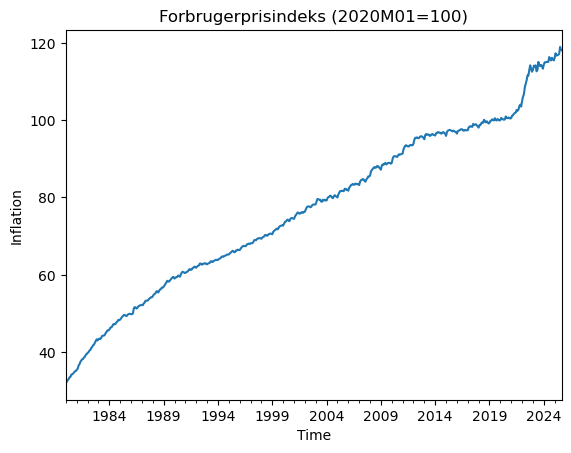

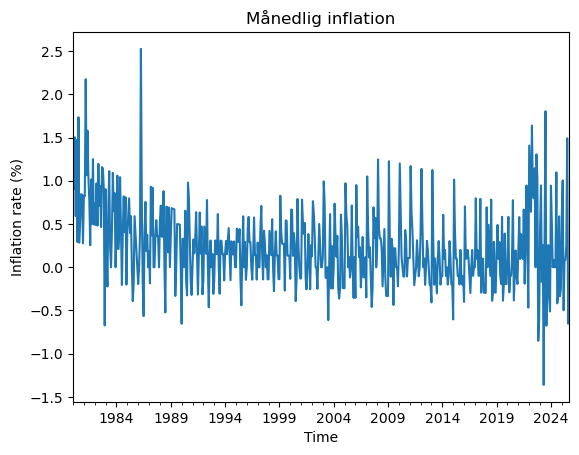

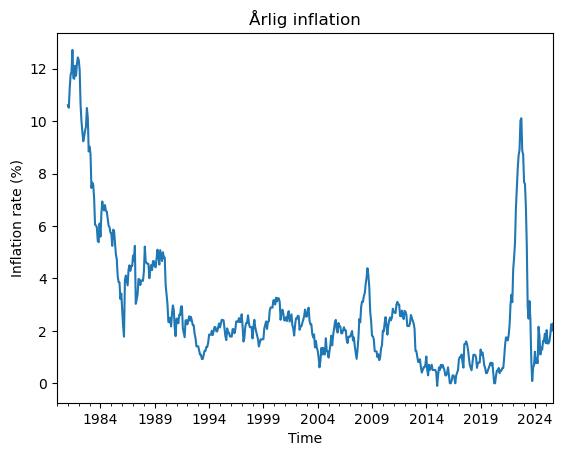

In [50]:
#Data work
#Importing data and saving as a dataframe
url = "https://api.statbank.dk/v1/data/PRIS113/CSV?TYPE=INDEKS&Tid=*"
data = pd.read_csv(url, sep=';')

#Converting commas to dots
data['INDHOLD'] = data['INDHOLD'].str.replace(',', '.')
data['INDHOLD'] = pd.to_numeric(data['INDHOLD'])
#Converting date strings to datetime
data['TID'] = pd.to_datetime(data['TID'], format='%YM%m')
#Setting TID as index
data.set_index('TID', inplace=True)

#1.1 (1.)
#Finding the value of 2020M01
base_value = data.loc[data.index == '2020-01-01', 'INDHOLD'].values[0]
print(base_value)

#Creating a new column with index 2020M01=100
data['INDEKS_2020'] = data['INDHOLD'] / base_value *100
#Check
print(data.head())

#Plotting the new index 
plt.figure()
data['INDEKS_2020'].plot(xlabel='Time',ylabel='Inflation', title='Forbrugerprisindeks (2020M01=100)')

#1.1 (2.)
#Finding month to month inflation rate in percent
data['INFLATION'] = (data['INDHOLD']/data['INDHOLD'].shift(1)-1)*100
#Check
print(data.head())
#Plotting the inflation rate
plt.figure()
data['INFLATION'].plot(xlabel='Time',ylabel='Inflation rate (%)', title='Månedlig inflation')


#1.1 (3.) 
#Finding the annual inflation rate in percent
data['ANNUAL_INFLATION'] = (data['INDHOLD']/data['INDHOLD'].shift(12)-1)*100
#Check
print(data.head())
#Plotting the annual inflation rate
plt.figure()
data['ANNUAL_INFLATION'].plot(xlabel='Time',ylabel='Inflation rate (%)', title='Årlig inflation')



## Question 1.2

We process the data by ...

KeyError: 'log_GDP'

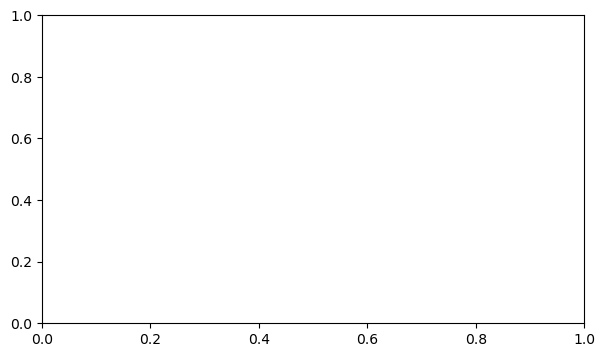

In [51]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)

ax.plot(data['log_GDP'],label='log(GDP)')

ax.set_title('Log GDP over time')
ax.set_xlabel('Year')
ax.set_ylabel('Log GDP')

ax.legend(); 

We find that that ...